In [ ]:
import torch
import clip
from PIL import Image
import csv
import os
import numpy as np

## Read meta and arrange labels

In [3]:
label_dict = {}

In [4]:
# get things_concepts.tsv from https://osf.io/jum2f/ in main/ folder
with open("things_concepts.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for i,line in enumerate(tsv_file):
        name = line[1]
        label_dict[name] = {}
        label_dict[name]['bottom'] = line[14]
        label_dict[name]['top'] = line[16] # chose top-down categories as true labels to evaluate prediction

In [5]:
image_meta = {}

In [6]:
images_files = os.listdir('CVPR/Original/')

In [7]:
# create label object for images in our dataset that have some top-down categories given. 
sel_meta = {}
bottoms = []
tops = []
for im in images_files:
    parts = im.split('_')
    parts = parts[:-1]
    if(len(parts)>1):
        name = parts[0]+'_'+parts[1]
    else:
        name = parts[0]
    im_name = im.split('.')[0]
    image_meta[im]=name
    tp = label_dict[name]['top']
    if(tp == ''):
        continue
    if(',' in tp):
        tp = tp.split(',')
    sel_meta[im_name] = tp 

In [8]:
len(sel_meta.keys()) # number of images in our set with top-down labels. We will use only these images in our analysis

2566

In [9]:
# script to find all unique labels for our classification task
labels = []
for k in sel_meta:
    label = sel_meta[k]
    if(type(label) is list):
        for l in label:
            labels.append(l)
    else:
        labels.append(label)

In [10]:
text_labels = np.unique(labels) # here we have all the unique labels

## Evaluate Vit B/32 with top 3 accuracy

In [120]:
vit_32 = []

In [121]:
## Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

text = clip.tokenize(text_labels).to(device)

with torch.no_grad():
    text_features = model.encode_text(text)
    


In [122]:
## Check on Original Images
input_images_dir = 'CVPR/Original/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_32.append(correct)    

1820 / 2566


In [123]:
# Check correctly identified outline images
input_images_dir = 'CVPR/Outline/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_32.append(correct)    

1508 / 2566


In [124]:
# Check correctly identified dotted images with distance 8
input_images_dir = 'CVPR/Dotted_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_32.append(correct)        

764 / 2566


In [125]:
# Check correctly identified constellations images with distance 8
input_images_dir = 'CVPR/Constellation_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_32.append(correct)        

374 / 2566


## VIT B/16

In [114]:
vit_16 = []

In [115]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

text = clip.tokenize(text_labels).to(device)

with torch.no_grad():
    text_features = model.encode_text(text)
    


In [116]:
input_images_dir = 'CVPR/Original/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 5 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_16.append(correct)    

1891 / 2566


In [117]:
# Check correctly identifies outline images
input_images_dir = 'CVPR/Outline/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_16.append(correct)    

1544 / 2566


In [118]:
input_images_dir = 'CVPR/Dotted_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_16.append(correct)   

978 / 2566


In [119]:
input_images_dir = 'CVPR/Constellation_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
vit_16.append(correct)    

437 / 2566


## Resnet 50X4

In [126]:
resnet_50_4 = []

In [127]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50x4', device=device,jit=False )

text = clip.tokenize(text_labels).to(device)

with torch.no_grad():
    text_features = model.encode_text(text)
    


In [128]:
input_images_dir = 'CVPR/Original/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_50_4.append(correct)    

1706 / 2566


In [129]:
# Check correctly identifies outline images
input_images_dir = 'CVPR/Outline/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_50_4.append(correct)        

1476 / 2566


In [130]:
input_images_dir = 'CVPR/Dotted_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_50_4.append(correct)        

671 / 2566


In [131]:
input_images_dir = 'CVPR/Constellation_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_50_4.append(correct)        

214 / 2566


## Resnet large

In [108]:
resnet_large = []

In [109]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50x16', device=device,jit=False )

text = clip.tokenize(text_labels).to(device)

with torch.no_grad():
    text_features = model.encode_text(text)
    


In [110]:
input_images_dir = 'CVPR/Original/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_large.append(correct)    

1760 / 2566


In [111]:
input_images_dir = 'CVPR/Outline/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_large.append(correct)    

1547 / 2566


In [112]:
input_images_dir = 'CVPR/Dotted_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_large.append(correct)    

844 / 2566


In [113]:
input_images_dir = 'CVPR/Constellation_8/'
correct = 0
for i,im in enumerate(sel_meta.keys()):
    image = preprocess(Image.open(input_images_dir+im+'.jpg')).unsqueeze(0).to(device)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()
    o_cats = text_labels[np.flip(np.argsort(probs))][0][:3] # top 3 accuracy
    cats = sel_meta[im]
    for o_cat in o_cats:
        if(o_cat in cats):
            correct +=1
            break
print(correct,'/',len(sel_meta.keys()))    
resnet_large.append(correct)  

364 / 2566


## Plot

### Comparison between modalities

In [132]:
vit_32 

[1820, 1508, 764, 374]

In [133]:
vit_16 = np.array(vit_16)
vit_32 = np.array(vit_32)
resnet_50_4 = np.array(resnet_50_4)
resnet_large = np.array(resnet_large)

In [134]:
total_images_evaluated = 2566

In [138]:
vit_16_acc = vit_16/total_images_evaluated
vit_32_acc = vit_32/total_images_evaluated
resnet_50_4_acc = resnet_50_4/total_images_evaluated
resnet_large_acc = resnet_large/total_images_evaluated

In [190]:
baseline = (1- (40/41)*(40/41)*(40/41))  # 41 object categories in our subset, top 3 accuracy

In [191]:
baseline

0.07140058908025138

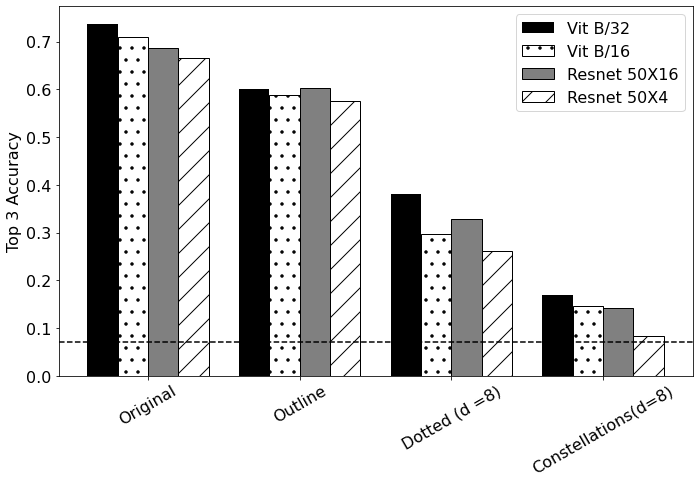

In [194]:
import matplotlib.pyplot as plt
import numpy as np

font = {'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
labels = ['Original', 'Outline', 'Dotted (d =8)', 'Constellations(d=8)']
vit_p = vit_acc
resnet_p = resnet_acc

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

#plt.figure(figsize=(15, 90))
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

rects1 = ax.bar(x - 3*(width/2), vit_16_acc, width, label='Vit B/32', color = 'black')
rects2 = ax.bar(x - width/2, vit_32_acc, width, label='Vit B/16',color = 'white',edgecolor='black',hatch = '.')
rects3 = ax.bar(x + width/2, resnet_large_acc, width, label='Resnet 50X16',color = 'grey',edgecolor='black')
rects4 = ax.bar(x + 3*(width/2), resnet_50_4_acc, width, label='Resnet 50X4',color = 'white', hatch = '/',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Top 3 Accuracy')
ax.set_xticks(x, labels,rotation = 30)
ax.legend()
ax.axhline(y=baseline, color='black', linestyle='--')


fig.tight_layout()

plt.show()